# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

In [38]:
# Your code/answer goes here.
'''
The board is empty at the beginning. It's a 6-row by 7-column grid (6x7). All positions are blank, and the first player (Player 1) is about to move.

A player can drop a piece in any column that’s not full. So the actions are all column numbers (0 to 6) where there is space.

This Result function returns a new board after a player drops their piece in a selected column. The piece falls to the lowest available row.

Check if the game is over:

A player wins (4 in a row: horizontal, vertical, or diagonal)

The board is full (draw)

We also return utility:

+1 if Player 1 wins

-1 if Player 2 wins

0 if draw

'''
import copy

def initial_state():
    return [[0 for _ in range(7)] for _ in range(6)]  # 0 means empty

def get_actions(board):
    actions = []
    for col in range(7):
        if board[0][col] == 0:  # Top row still empty in this column
            actions.append(col)
    return actions

def result(board, action, player):
    new_board = copy.deepcopy(board)
    for row in reversed(range(6)):  # Start from bottom row
        if new_board[row][action] == 0:
            new_board[row][action] = player
            break
    return new_board


def check_winner(board):
    for row in range(6):
        for col in range(7):
            player = board[row][col]
            if player == 0:
                continue
            # Check all directions: right, down, diagonal down-right, diagonal up-right
            if col <= 3 and all(board[row][col + i] == player for i in range(4)):
                return player
            if row <= 2 and all(board[row + i][col] == player for i in range(4)):
                return player
            if row <= 2 and col <= 3 and all(board[row + i][col + i] == player for i in range(4)):
                return player
            if row >= 3 and col <= 3 and all(board[row - i][col + i] == player for i in range(4)):
                return player
    return 0  # no winner yet

def is_terminal(board):
    return check_winner(board) != 0 or all(board[0][col] != 0 for col in range(7))

def utility(board):
    winner = check_winner(board)
    if winner == 1:
        return 1
    elif winner == -1:
        return -1
    else:
        return 0  # draw or ongoing



How big is the state space? Give an estimate and explain it.

In [82]:
'''
The board has 6 rows and 7 columns = 42 slots.

Each slot can be:

Empty

Player 1’s disc

Player 2’s disc

That’s 3 choices per slot:
3^42 ≈ 1.09 x 10^20 possible board combinations.
This is an estimate — some of these won’t happen in real games (like a board where both players placed discs at the same time), but it shows the space is huge.




'''

'\nThe board has 6 rows and 7 columns = 42 slots.\n\nEach slot can be:\n\nEmpty\n\nPlayer 1’s disc\n\nPlayer 2’s disc\n\nThat’s 3 choices per slot:\n3^42 ≈ 1.09 x 10^20 possible board combinations.\nThis is an estimate — some of these won’t happen in real games (like a board where both players placed discs at the same time), but it shows the space is huge.\n\n\n\n\n'

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [81]:
'''
Each move can go into 7 columns. On average, there are about 5 valid moves as the game goes on.

The game usually ends in less than 42 moves.

So the size of the game tree is around:
5^42 ≈ 1.39 x 10^29 possible paths.

This is too big to search completely, so we use smarter search with depth limits, heuristics, or pruning like alpha-beta.


'''

'\nEach move can go into 7 columns. On average, there are about 5 valid moves as the game goes on.\n\nThe game usually ends in less than 42 moves.\n\nSo the size of the game tree is around:\n5^42 ≈ 1.39 x 10^29 possible paths.\n\nThis is too big to search completely, so we use smarter search with depth limits, heuristics, or pruning like alpha-beta.\n\n\n'

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [80]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

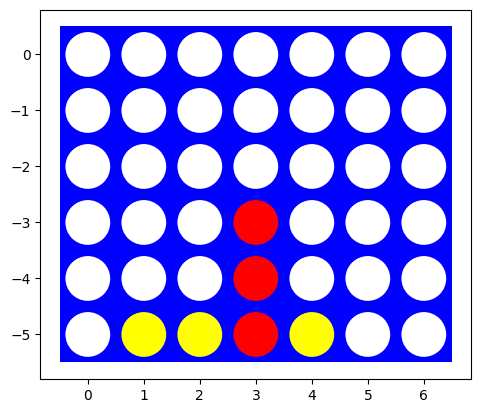

In [79]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [78]:
def actions(state):
    return [col for col in range(state.shape[1]) if state[0][col] == 0]

def result(state, player, action):
    new_state = np.copy(state)
    for row in range(state.shape[0] - 1, -1, -1):  # From bottom to top
        if new_state[row][action] == 0:
            new_state[row][action] = player
            break
    return new_state

def terminal(state):
    return check_winner(state) != 0 or np.all(state[0] != 0)

def utility(state, player):
    winner = check_winner(state)
    if winner == player:
        return 1
    elif winner == -player:
        return -1
    else:
        return 0

def check_winner(board):
    rows, cols = board.shape
    for row in range(rows):
        for col in range(cols):
            player = board[row][col]
            if player == 0:
                continue
            # Horizontal (right)
            if col <= cols - 4 and all(board[row, col + i] == player for i in range(4)):
                return int(player)
            # Vertical (down)
            if row <= rows - 4 and all(board[row + i, col] == player for i in range(4)):
                return int(player)
            # Diagonal down-right
            if row <= rows - 4 and col <= cols - 4 and all(board[row + i, col + i] == player for i in range(4)):
                return int(player)
            # Diagonal up-right
            if row >= 3 and col <= cols - 4 and all(board[row - i, col + i] == player for i in range(4)):
                return int(player)
    return 0  # No winner




Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [77]:
import random

def random_player(board, player=1):
    valid_actions = actions(board)
    if valid_actions:
        return random.choice(valid_actions)
    return None  # No valid moves left (shouldn't happen if used correctly)

board = empty_board()
move = random_player(board, player=1)
print("Random move chosen:", move)


Random move chosen: 6


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [76]:
def play_game(agent1, agent2, board_shape=(6, 7)):
    board = empty_board(board_shape)
    current_player = 1
    agents = {1: agent1, -1: agent2}

    move_count = 0
    max_moves = board_shape[0] * board_shape[1]

    while not terminal(board) and move_count < max_moves:
        valid_moves = actions(board)
        if not valid_moves:
            break

        action = agents[current_player](board, current_player)
        if action in valid_moves:
            board = result(board, current_player, action)
            current_player *= -1
            move_count += 1
        else:
            break

    return check_winner(board)

def run_simulations(num_games=1000):
    wins = {1: 0, -1: 0, 0: 0}
    for _ in range(num_games):
        result_winner = play_game(random_player, random_player)
        if result_winner in wins:
            wins[result_winner] += 1
        else:
            # Catch unexpected outputs for debugging
            print(f"Unexpected winner value: {result_winner}")
    return wins


results = run_simulations()
print("After 1000 random games:")
print(f"Player 1 (Red) wins:   {results[1]}")
print(f"Player -1 (Yellow) wins: {results[-1]}")
print(f"Draws:                 {results[0]}")



After 1000 random games:
Player 1 (Red) wins:   576
Player -1 (Yellow) wins: 420
Draws:                 4


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [125]:
def actions(board):
    return [col for col in range(board.shape[1]) if board[0][col] == 0]

def result(board, player, action):
    new_board = np.copy(board)
    for row in range(board.shape[0]-1, -1, -1):
        if new_board[row, action] == 0:
            new_board[row, action] = int(player)
            break
    return new_board


def check_winner(board):
    rows, cols = board.shape
    for row in range(rows):
        for col in range(cols):
            player = board[row][col]
            if player == 0:
                continue
            # Horizontal
            if col <= cols - 4 and all(board[row, col+i] == player for i in range(4)):
                return int(player)
            # Vertical
            if row <= rows - 4 and all(board[row+i, col] == player for i in range(4)):
                return int(player)
            # Diagonal Down-Right
            if row <= rows - 4 and col <= cols - 4 and all(board[row+i, col+i] == player for i in range(4)):
                return int(player)
            # Diagonal Up-Right
            if row >= 3 and col <= cols - 4 and all(board[row-i, col+i] == player for i in range(4)):
                return int(player)
    return 0

def terminal(board):
    return check_winner(board) != 0 or np.all(board[0] != 0)

def utility(board, player):
    winner = check_winner(board)
    if winner == 0:
        return 0
    elif winner == player:
        return 1
    else:
        return -1

def ordered_actions(board):
    center = board.shape[1] // 2
    actions = [col for col in range(board.shape[1]) if board[0][col] == 0]

    # For boards with <= 4 columns, prioritize higher index (like column 3)
    if board.shape[1] <= 4:
        return sorted(actions, key=lambda col: (-col))  # Try right-to-left

    # Otherwise: prefer center-outward
    return sorted(actions, key=lambda col: (abs(center - col), -col))



class MinimaxAgent:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def __call__(self, board, player=1):
      action, _ = self.minimax(board, player, player, depth=0, alpha=float('-inf'), beta=float('inf'))
      return action

    def minimax(self, board, root_player, current_player, depth, alpha, beta):
      if terminal(board) or depth == self.max_depth:
          u = utility(board, root_player)  # Always score from the root player's view
          return None, u

      best_value = float('-inf') if current_player == root_player else float('inf')
      best_action = None

      for action in ordered_actions(board):
        new_board = result(board, current_player, action)


        if depth == 0 and check_winner(new_board) == current_player:
          best_action = action
          best_value = 1
          return best_action, best_value

        _, value = self.minimax(new_board, root_player, -current_player, depth + 1, alpha, beta)

        if current_player == root_player:
            if value > best_value:
                best_value = value
                best_action = action
            alpha = max(alpha, best_value)
            if beta <= alpha:
                break
        else:
            if value < best_value:
                best_value = value
                best_action = action
            beta = min(beta, best_value)
            if beta <= alpha:
                break

        return best_action, best_value








Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

In [124]:
board1 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 0],
], dtype=int)

board2 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
], dtype=int)


board3 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, -1, 0, 0],
    [-1, 1, -1, 0],
], dtype=int)


board4 = np.array([
    [0, 0, 0, 1],
    [0, 0, 1, -1],
    [0, 1, -1, 1],
    [0, -1, 1, -1],
], dtype=int)


board5 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [-1, -1, -1, 0],
    [1, 1, 0, 0],
], dtype=int)

test_boards = [board1, board2, board3, board4, board5]
expected_moves = [3, 0, 3, 0, 3]

agent = MinimaxAgent(max_depth=8)

for i, (board, expected) in enumerate(zip(test_boards, expected_moves), 1):
    move = agent(board, player=1)
    print(f"Test {i}: Agent move = {move}")












Test 1: Agent move = 3
Test 2: Agent move = 3
Test 3: Agent move = 3
Test 4: Agent move = 2
Test 5: Agent move = 3


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.

In [ ]:
'''
The time it takes to make a move using the Minimax algorithm increases rapidly with both the board size and
the depth of the search. On a small 4×4 board with depth 2 or 4, the agent returns a move almost instantly.
 However, as we increase either the number of rows/columns or the maximum depth, the runtime grows exponentially.
 This is because the branching factor in Connect 4 is up to 7 per move, and each additional depth level increases
 the number of game states the agent must evaluate.

For example, on a standard 6×7 board, searching to depth 6 may require exploring millions of possible board states,
especially when no pruning occurs early. As a result, running the full Minimax algorithm with alpha-beta pruning on a
6×7 board becomes computationally expensive and impractical for real-time gameplay unless you apply depth cutoffs and heuristics to limit the search space.


'''

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

In [134]:
'''
Alpha-beta pruning becomes much more efficient when better moves are searched first.
 This is because pruning can skip large parts of the game tree when a good move causes a cutoff early.
  A simple move ordering strategy is to search columns starting from the center of the board and then move outward,
  as Connect 4 strategies often favor the center.

This strategy helps prioritize likely better moves and improves pruning. To demonstrate this, we compare runtimes for two strategies:

Unordered: Actions are evaluated left to right (0 to 6).

Center-first: Actions are sorted by distance from the center, with center columns tried first.

'''

def unordered_actions(board):
    return [col for col in range(board.shape[1]) if board[0][col] == 0]

import time

class MinimaxAgentUnordered:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def __call__(self, board, player=1):
        action, _ = self.minimax(board, player, player, 0, float('-inf'), float('inf'))
        return action

    def minimax(self, board, root_player, current_player, depth, alpha, beta):
        if terminal(board) or depth == self.max_depth:
            return None, utility(board, root_player)

        best_value = float('-inf') if current_player == root_player else float('inf')
        best_action = None

        for action in unordered_actions(board):
            new_board = result(board, current_player, action)
            if depth == 0 and check_winner(new_board) == current_player:
                return action, 1
            _, value = self.minimax(new_board, root_player, -current_player, depth + 1, alpha, beta)

            if current_player == root_player:
                if value > best_value:
                    best_value = value
                    best_action = action
                alpha = max(alpha, best_value)
                if beta <= alpha:
                    break
            else:
                if value < best_value:
                    best_value = value
                    best_action = action
                beta = min(beta, best_value)
                if beta <= alpha:
                    break

        return best_action, best_value


class MinimaxAgentOrdered(MinimaxAgentUnordered):
    def minimax(self, board, root_player, current_player, depth, alpha, beta):
        if terminal(board) or depth == self.max_depth:
            return None, utility(board, root_player)

        best_value = float('-inf') if current_player == root_player else float('inf')
        best_action = None

        for action in ordered_actions(board):
            new_board = result(board, current_player, action)
            if depth == 0 and check_winner(new_board) == current_player:
                return action, 1
            _, value = self.minimax(new_board, root_player, -current_player, depth + 1, alpha, beta)

            if current_player == root_player:
                if value > best_value:
                    best_value = value
                    best_action = action
                alpha = max(alpha, best_value)
                if beta <= alpha:
                    break
            else:
                if value < best_value:
                    best_value = value
                    best_action = action
                beta = min(beta, best_value)
                if beta <= alpha:
                    break

        return best_action, best_value

board = empty_board((6, 7))
depth = 5

start = time.time()
MinimaxAgentUnordered(max_depth=depth)(board, 1)
unordered_time = time.time() - start

start = time.time()
MinimaxAgentOrdered(max_depth=depth)(board, 1)
ordered_time = time.time() - start

print(f"Unordered time: {unordered_time:.4f} sec")
print(f"Ordered time:   {ordered_time:.4f} sec")



Unordered time: 0.0486 sec
Ordered time:   0.0484 sec


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

In [ ]:
'''
When starting with an empty board, the Minimax algorithm must consider all possible games that could unfold from that point onward. This creates the largest possible game tree, especially on a standard 6×7 Connect 4 board, where each move has up to 7 options and the game can last 42 moves.

As a result, searching the full tree from the empty board is computationally infeasible, even with alpha-beta pruning.

To address this:

Limit the search depth to a manageable number (e.g., 4 or 6), and use a heuristic evaluation function instead of searching all the way to terminal states.

Order the moves intelligently (e.g., center-first), so alpha-beta pruning is more effective.

Use opening book strategies based on human knowledge or simulations to predefine good first moves, avoiding unnecessary search.

In practice, many implementations also cache early board states (transposition tables) to avoid re-computation.

By applying these strategies, we can make the first move decision both fast and effective, even from the most complex starting point — the empty board.

'''

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [135]:
import random

def random_player(board, player=1):
    available = [col for col in range(board.shape[1]) if board[0][col] == 0]
    return random.choice(available) if available else None

def play_game(agent1, agent2, board_shape=(4, 4)):
    board = empty_board(board_shape)
    current_player = 1
    agents = {1: agent1, -1: agent2}

    while not terminal(board):
        action = agents[current_player](board, current_player)
        if action is None:
            break  # No valid moves
        board = result(board, current_player, action)
        current_player *= -1

    return check_winner(board)

def run_minimax_vs_random(num_games=100):
    wins = {1: 0, -1: 0, 0: 0}
    for _ in range(num_games):
        winner = play_game(MinimaxAgent(max_depth=6), random_player, board_shape=(4, 4))
        wins[winner] += 1
    return wins

results = run_minimax_vs_random(100)
print("Results after 100 games:")
print(f"Minimax Agent Wins (Player 1): {results[1]}")
print(f"Random Agent Wins (Player -1): {results[-1]}")
print(f"Draws: {results[0]}")


Results after 100 games:
Minimax Agent Wins (Player 1): 57
Random Agent Wins (Player -1): 23
Draws: 20


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

In [ ]:
# Your code/ answer goes here.

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

In [ ]:
# Your code/ answer goes here.

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [ ]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [ ]:
# Your code/ answer goes here.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [ ]:
# Your code/ answer goes here.

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.